#📌 Extracão

In [9]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
dados = pd.read_json(url)

dados.head() #mostra as primeiras linhas - tail() mostra as ultimas



,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [11]:
dados.shape # exibe o numero de linhas/ colunas

dados.columns #exibe as colunas
dados.info() #exibe o tipo de dado de cada coluna

dados[['Churn', 'customer','phone','internet','account']] # colunas relevantes para analise

#dados.describe() #obter estatisticas basicas dos dados

dados.Churn.unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


array(['No', 'Yes', ''], dtype=object)

#📊 Carga e análise

In [12]:
dados_churn_vazio = dados.query('"" in Churn')
dados = dados.query('"" not in Churn')
dados
dados.Churn.unique()


array(['No', 'Yes'], dtype=object)

#📄Relatorio Final

In [13]:
len(pd.unique(dados["customerID"]))
dados.isnull().sum()


customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

In [14]:

dados["Monthly"] = dados["account"].apply(lambda x: x["Charges"]["Monthly"])
dados["Contas_Diarias"] = dados["Monthly"] / 30



In [15]:
#testando a normalização 

#explodindo cada coluna em um dataframe
df_customer = pd.json_normalize(dados['customer'])
df_phone = pd.json_normalize(dados['phone'])
df_internet = pd.json_normalize(dados['internet'])
df_account = pd.json_normalize(dados['account'])

# Concatenar tudo no DataFrame principal

dados = pd.concat([dados.drop(columns=["customer", "phone", "internet", "account"]), df_customer, df_phone, df_internet, df_account], axis=1)

dados.columns
dados


,customerID,Churn,Monthly,Contas_Diarias,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,65.6,2.186667,Female,0.0,Yes,Yes,9.0,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,59.9,1.996667,Male,0.0,No,No,9.0,Yes,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,73.9,2.463333,Male,0.0,No,No,4.0,Yes,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,98.0,3.266667,Male,1.0,Yes,No,13.0,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,83.9,2.796667,Female,1.0,Yes,No,3.0,Yes,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6980,NaN,NaN,NaN,NaN,Female,1.0,No,No,1.0,No,...,No,No,No,No,No,Month-to-month,No,Mailed check,25.05,25.05
7002,NaN,NaN,NaN,NaN,Female,0.0,No,No,15.0,Yes,...,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Mailed check,84.45,1287.85
7009,NaN,NaN,NaN,NaN,Male,0.0,No,No,32.0,Yes,...,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),85.65,2664.3
7016,NaN,NaN,NaN,NaN,Male,0.0,Yes,No,69.0,No,...,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),60.80,4263.4


In [17]:
dados.info()

dados.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   Monthly           7043 non-null   float64
 3   Contas_Diarias    7043 non-null   float64
 4   gender            7043 non-null   object 
 5   SeniorCitizen     7043 non-null   float64
 6   Partner           7043 non-null   object 
 7   Dependents        7043 non-null   object 
 8   tenure            7043 non-null   float64
 9   PhoneService      7043 non-null   object 
 10  MultipleLines     7043 non-null   object 
 11  InternetService   7043 non-null   object 
 12  OnlineSecurity    7043 non-null   object 
 13  OnlineBackup      7043 non-null   object 
 14  DeviceProtection  7043 non-null   object 
 15  TechSupport       7043 non-null   object 
 16  StreamingTV       7043 non-null   object 
 17  

customerID          213
Churn               213
Monthly             213
Contas_Diarias      213
gender              213
SeniorCitizen       213
Partner             213
Dependents          213
tenure              213
PhoneService        213
MultipleLines       213
InternetService     213
OnlineSecurity      213
OnlineBackup        213
DeviceProtection    213
TechSupport         213
StreamingTV         213
StreamingMovies     213
Contract            213
PaperlessBilling    213
PaymentMethod       213
Charges.Monthly     213
Charges.Total       213
dtype: int64

In [18]:
dados.dropna(inplace=True) #Para remover todas as linhas que contêm pelo menos um valor nulo (NaN)

dados.info()

dados.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 6830 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6830 non-null   object 
 1   Churn             6830 non-null   object 
 2   Monthly           6830 non-null   float64
 3   Contas_Diarias    6830 non-null   float64
 4   gender            6830 non-null   object 
 5   SeniorCitizen     6830 non-null   float64
 6   Partner           6830 non-null   object 
 7   Dependents        6830 non-null   object 
 8   tenure            6830 non-null   float64
 9   PhoneService      6830 non-null   object 
 10  MultipleLines     6830 non-null   object 
 11  InternetService   6830 non-null   object 
 12  OnlineSecurity    6830 non-null   object 
 13  OnlineBackup      6830 non-null   object 
 14  DeviceProtection  6830 non-null   object 
 15  TechSupport       6830 non-null   object 
 16  StreamingTV       6830 non-null   object 
 17  

customerID          0
Churn               0
Monthly             0
Contas_Diarias      0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

array([ 9.,  4., 13.,  3., 71., 63.,  7., 65., 54., 72.,  5., 56., 34.,
        1., 45., 50., 23., 55., 26., 69., 49., 66., 67., 20., 43., 59.,
       12., 27.,  2., 25., 29., 14., 35., 64., 39., 40., 11.,  6., 30.,
       70., 57., 58., 16., 32., 33., 10., 21., 37., 61., 15., 44., 22.,
       19., 47., 62., 46., 52.,  8., 60., 48., 28., 41., 53., 68., 31.,
       36., 17., 18., 51., 24., 42., 38.,  0.])

In [ ]:
# Supondo que seu DataFrame final se chama 'dados_tratados_final'

# dados.to_csv('dados_tratados.csv', index=False)

# print("DataFrame salvo com sucesso como 'dados_tratados.csv'!")

DataFrame salvo com sucesso como 'dados_tratados.csv'!


In [27]:
dados_tratados = dados.drop('customerID', axis=1)

dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6830 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             6830 non-null   object 
 1   Monthly           6830 non-null   float64
 2   Contas_Diarias    6830 non-null   float64
 3   gender            6830 non-null   object 
 4   SeniorCitizen     6830 non-null   float64
 5   Partner           6830 non-null   object 
 6   Dependents        6830 non-null   object 
 7   tenure            6830 non-null   float64
 8   PhoneService      6830 non-null   object 
 9   MultipleLines     6830 non-null   object 
 10  InternetService   6830 non-null   object 
 11  OnlineSecurity    6830 non-null   object 
 12  OnlineBackup      6830 non-null   object 
 13  DeviceProtection  6830 non-null   object 
 14  TechSupport       6830 non-null   object 
 15  StreamingTV       6830 non-null   object 
 16  StreamingMovies   6830 non-null   object 
 17  

In [33]:
dados_tratados['Churn'] = dados_tratados['Churn'].astype('category')
dados_tratados['gender'] = dados_tratados['gender'].astype('category')
dados_tratados['Partner'] = dados_tratados['Partner'].astype('category')
dados_tratados['SeniorCitizen'] = dados_tratados['SeniorCitizen'].astype('category')

dados_tratados['Dependents'] = dados_tratados['Dependents'].astype('category')
dados_tratados['PhoneService'] = dados_tratados['PhoneService'].astype('category')
dados_tratados['MultipleLines'] = dados_tratados['MultipleLines'].astype('category')
dados_tratados['InternetService'] = dados_tratados['InternetService'].astype('category')
dados_tratados['OnlineSecurity'] = dados_tratados['OnlineSecurity'].astype('category')
dados_tratados['OnlineBackup'] = dados_tratados['OnlineBackup'].astype('category')
dados_tratados['DeviceProtection'] = dados_tratados['DeviceProtection'].astype('category')
dados_tratados['TechSupport'] = dados_tratados['TechSupport'].astype('category')
dados_tratados['StreamingTV'] = dados_tratados['StreamingTV'].astype('category')
dados_tratados['StreamingMovies'] = dados_tratados['StreamingMovies'].astype('category')
dados_tratados['Contract'] = dados_tratados['Contract'].astype('category')
dados_tratados['PaperlessBilling'] = dados_tratados['PaperlessBilling'].astype('category')
dados_tratados['PaymentMethod'] = dados_tratados['PaymentMethod'].astype('category')
dados_tratados['Charges.Total'] = pd.to_numeric(dados_tratados['Charges.Total'], errors='coerce')


In [ ]:
""" # separando em dados com e sem churn:

# clientes que saíram (Churn = "Yes")
dados_churn = dados[dados["Churn"] == "Yes"].copy()

# clientes que ficaram (Churn = "No")
dados_sem_churn = dados[dados["Churn"] == "No"].copy()
 """

In [ ]:
""" print("Total com churn:", len(dados_churn))
print("Total sem churn:", len(dados_sem_churn))
 """

Total com churn: 1869
Total sem churn: 5174


In [34]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6830 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Churn             6830 non-null   category
 1   Monthly           6830 non-null   float64 
 2   Contas_Diarias    6830 non-null   float64 
 3   gender            6830 non-null   category
 4   SeniorCitizen     6830 non-null   category
 5   Partner           6830 non-null   category
 6   Dependents        6830 non-null   category
 7   tenure            6830 non-null   float64 
 8   PhoneService      6830 non-null   category
 9   MultipleLines     6830 non-null   category
 10  InternetService   6830 non-null   category
 11  OnlineSecurity    6830 non-null   category
 12  OnlineBackup      6830 non-null   category
 13  DeviceProtection  6830 non-null   category
 14  TechSupport       6830 non-null   category
 15  StreamingTV       6830 non-null   category
 16  StreamingMovies   6830 non-nu

In [35]:
dados_tratados.to_csv('dados_tratados.csv', index=False)

print("DataFrame salvo com sucesso como 'dados_tratados.csv'!")

DataFrame salvo com sucesso como 'dados_tratados.csv'!


In [36]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Carregue o DataFrame 'dados_tratados.csv'
# Suponha que o arquivo já foi salvo e contém as colunas limpas.
df = pd.read_csv('dados_tratados.csv')

# Identifique as colunas categóricas a serem codificadas
colunas_categoricas = [
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Inicialize o OneHotEncoder
# 'sparse_output=False' garante que a saída será um array denso (não esparso)
ohe = OneHotEncoder(sparse_output=False)

# Aplique a codificação one-hot nas colunas categóricas
df_encoded_cols = ohe.fit_transform(df[colunas_categoricas])

# Crie um DataFrame com as novas colunas codificadas
# 'ohe.get_feature_names_out()' cria os nomes das colunas de forma automática
df_encoded = pd.DataFrame(df_encoded_cols, columns=ohe.get_feature_names_out(colunas_categoricas))

# Junte o novo DataFrame codificado com as colunas numéricas originais
# 'axis=1' garante que a concatenação seja feita lado a lado
df_final = pd.concat([df.drop(columns=colunas_categoricas), df_encoded], axis=1)

# Verifique o resultado final do DataFrame
print(df_final.info())
print("\nPrimeiras 5 linhas do DataFrame codificado:")
print(df_final.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6830 entries, 0 to 6829
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Monthly                                  6830 non-null   float64
 1   Contas_Diarias                           6830 non-null   float64
 2   SeniorCitizen                            6830 non-null   float64
 3   tenure                                   6830 non-null   float64
 4   Charges.Monthly                          6830 non-null   float64
 5   Charges.Total                            6819 non-null   float64
 6   Churn_No                                 6830 non-null   float64
 7   Churn_Yes                                6830 non-null   float64
 8   gender_Female                            6830 non-null   float64
 9   gender_Male                              6830 non-null   float64
 10  Partner_No                               6830 no

In [37]:
df_final.to_csv('df_final.csv', index=False)

In [38]:
import pandas as pd

# Carregue o DataFrame final que foi salvo após a codificação
df = pd.read_csv('df_final.csv')

# Calcule a contagem de cada classe na coluna 'Churn_Yes'
# 1 = Clientes que evadiram (Yes)
# 0 = Clientes que permaneceram (No)
contagem_classes = df['Churn_Yes'].value_counts()

# Calcule a proporção de cada classe em porcentagem
proporcao_classes = df['Churn_Yes'].value_counts(normalize=True) * 100

print("Contagem de clientes por classe:")
print(contagem_classes)
print("\nProporção de clientes por classe (%):")
print(proporcao_classes)

# Salvar a contagem e a proporção para referência futura (opcional)
contagem_classes.to_csv('contagem_classes.csv')
proporcao_classes.to_csv('proporcao_classes.csv')

Contagem de clientes por classe:
Churn_Yes
0.0    5009
1.0    1821
Name: count, dtype: int64

Proporção de clientes por classe (%):
Churn_Yes
0.0    73.338214
1.0    26.661786
Name: proportion, dtype: float64


In [ ]:
Agora me ESCREVA o código em Python e bibliotecas, como biblioteca Sklearn, que:
Visualize a matriz de correlação para identificar relações entre variáveis numéricas. Observe especialmente quais variáveis apresentam maior correlação com a evasão, pois elas podem ser fortes candidatas para o modelo preditivo.

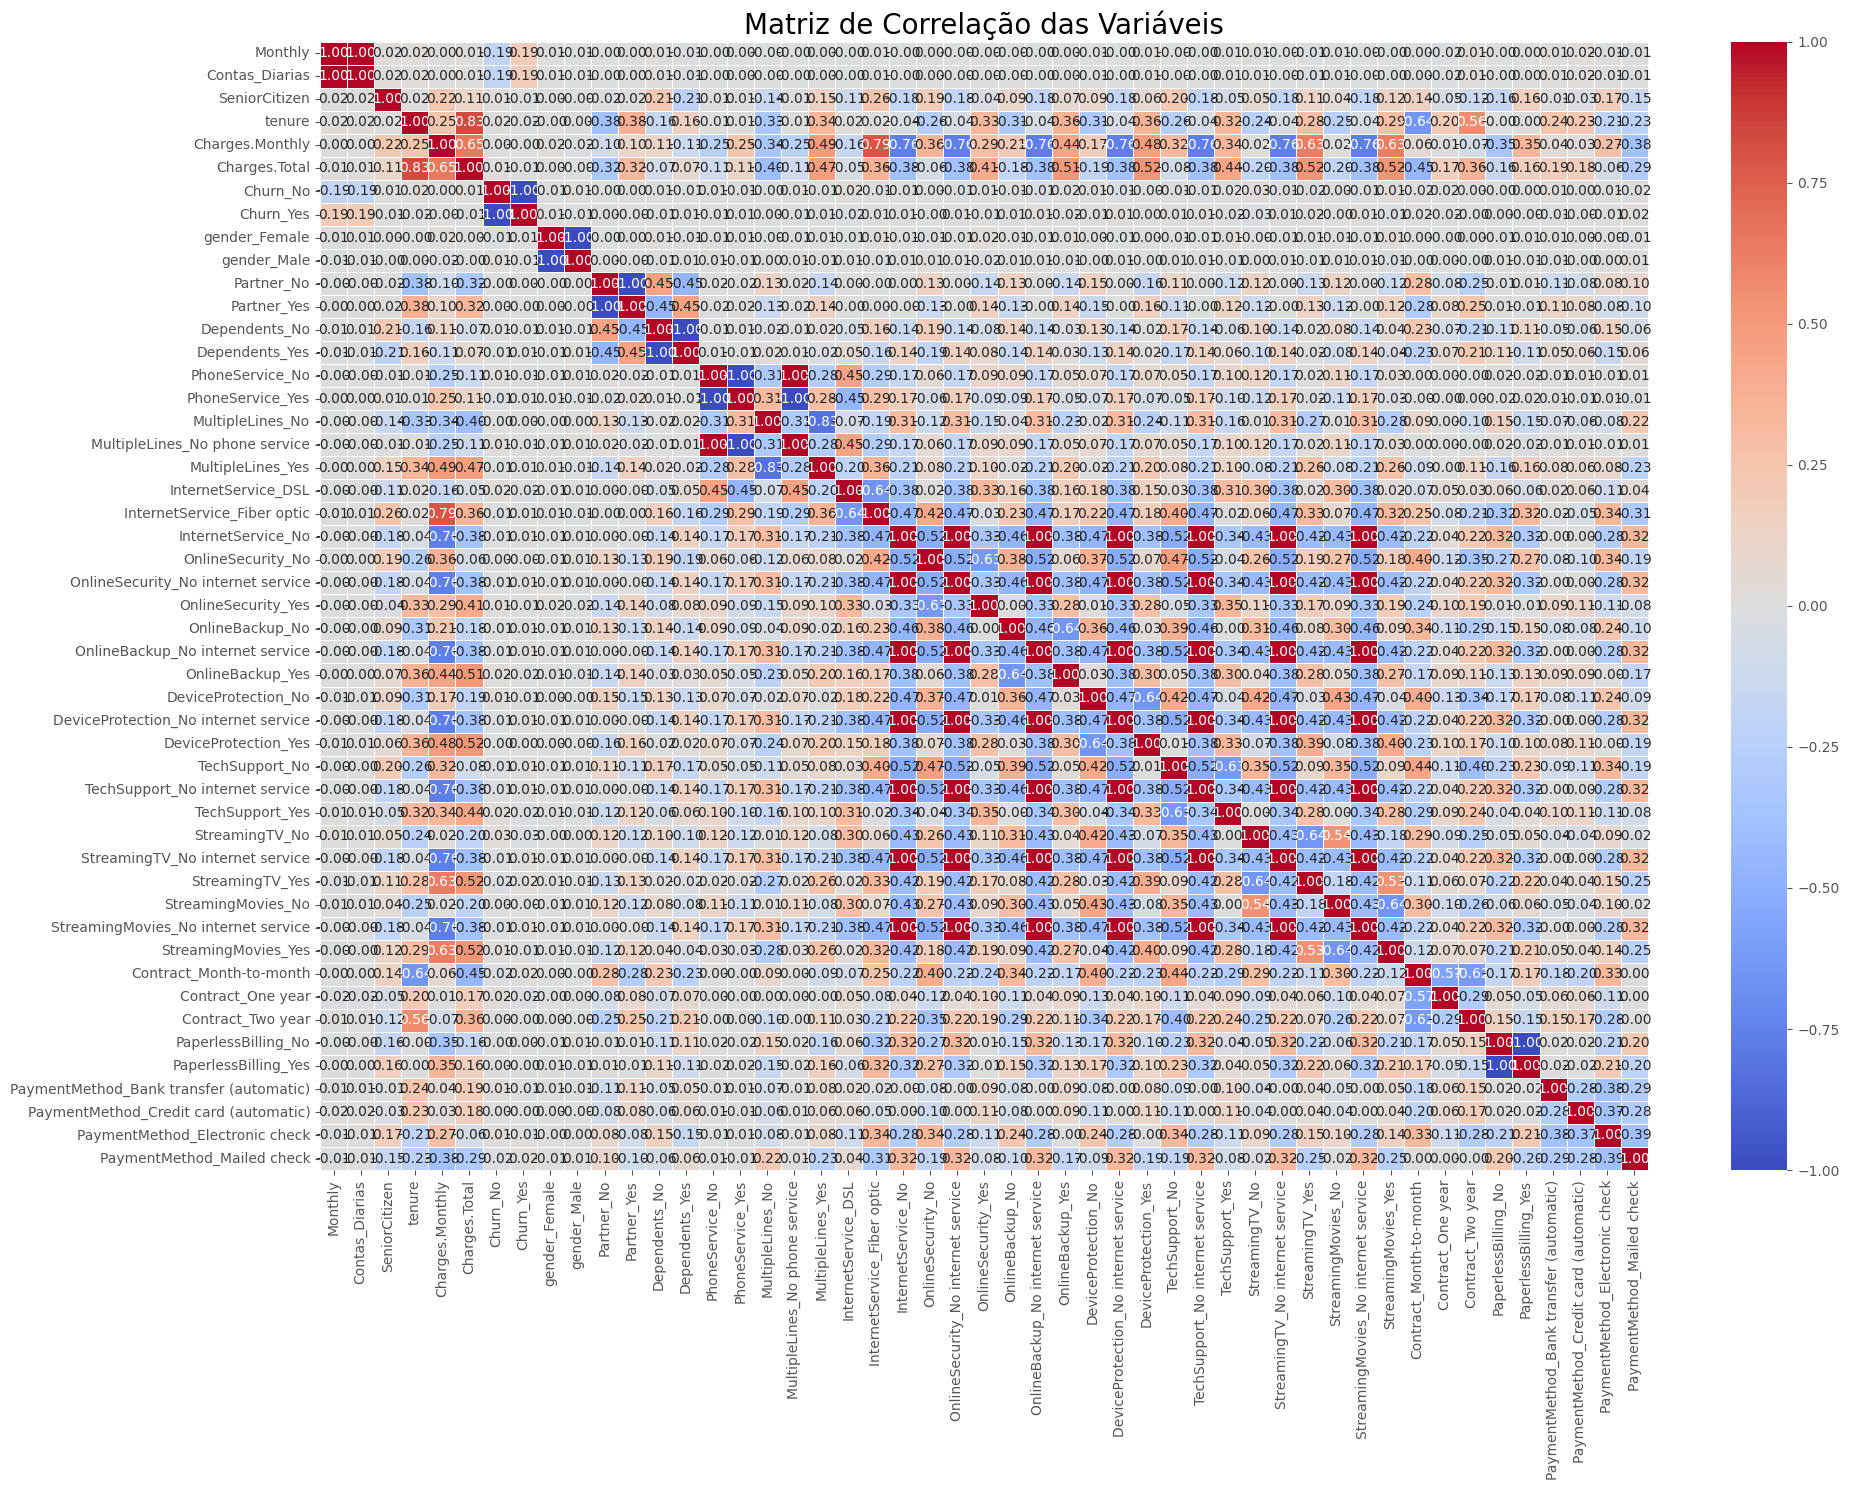

In [40]:
""""
O código a seguir criará um mapa de calor (heatmap) da matriz de correlação. Um valor de correlação próximo de 1 ou -1 indica uma forte relação linear (positiva ou negativa, respectivamente), enquanto um valor próximo de 0 indica uma correlação fraca.

"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregue o DataFrame final que contém as variáveis numéricas
df = pd.read_csv('df_final.csv')

# Calcule a matriz de correlação do DataFrame
correlation_matrix = df.corr()

# Configure o estilo e o tamanho do gráfico
plt.style.use('ggplot')
plt.figure(figsize=(20, 15))

# Crie o mapa de calor (heatmap)
sns.heatmap(
    correlation_matrix,
    annot=True,        # Mostra os valores de correlação no mapa
    cmap='coolwarm',   # Define o esquema de cores
    fmt=".2f",         # Formata os valores com 2 casas decimais
    linewidths=.5,     # Adiciona linhas entre as células
    vmin=-1,           # Garante que a escala de cor vá de -1 a 1
    vmax=1
)

# Adicione um título ao gráfico
plt.title('Matriz de Correlação das Variáveis', fontsize=20)

# Rotacione os rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Garanta que o layout da figura se ajuste bem
plt.tight_layout()

# Exiba o gráfico
plt.show()

# Opcionalmente, salve a figura em um arquivo
# plt.savefig('matriz_de_correlacao.png')

In [ ]:
interpretacao matriz:


A matriz de correlação que você obteve é uma ferramenta excelente para a sua análise. Ela visualiza de forma clara as relações lineares entre as variáveis, destacando quais delas são mais importantes para a evasão de clientes.

Analisando a linha/coluna Churn, podemos extrair as seguintes informações cruciais:

Fatores com Correlação Positiva (Maior chance de evasão)
Esses são os fatores que, quando presentes ou em maior valor, estão associados a uma maior probabilidade de o cliente evadir.

Contract_Month-to-month (0.41): Esta é a correlação mais forte. Clientes com contratos mensais têm uma chance significativamente maior de evadir em comparação com outros tipos de contrato.

InternetService_Fiber optic (0.31): O tipo de serviço de internet "Fibra Óptica" tem uma forte correlação positiva com a evasão, sugerindo problemas relacionados a esse serviço.

PaymentMethod_Electronic check (0.30): Clientes que pagam com cheque eletrônico têm uma probabilidade maior de evadir.

PaperlessBilling_Yes (0.19): Embora mais fraca, a correlação indica que clientes com contas online tendem a evadir mais.

SeniorCitizen_Yes (0.15): Pessoas idosas têm uma leve tendência a evadir.


Fatores com Correlação Negativa (Menor chance de evasão)
Esses são os fatores que, quando presentes ou em maior valor, estão associados a uma menor probabilidade de o cliente evadir.

tenure (-0.35): Esta é a correlação negativa mais forte. Quanto maior o tempo de permanência (tenure) do cliente, menor a chance de ele evadir.

Contract_Two year (-0.30): Clientes com contratos de dois anos são muito menos propensos a evadir, o que faz sentido, já que o contrato é de longo prazo.

TechSupport_Yes (-0.28): Ter suporte técnico está fortemente associado à permanência do cliente.

OnlineSecurity_Yes (-0.27): Oferecer segurança online também está ligado à menor evasão.

Charges.Total (-0.20): Cobranças totais mais altas estão negativamente correlacionadas com a evasão. Isso provavelmente se deve ao fato de que clientes com cobranças totais mais altas já estão com a empresa há muito tempo (tenure).




Conclusão para o seu modelo
A matriz de correlação é um guia excelente. As variáveis com as maiores correlações (positivas ou negativas) com o Churn são as melhores candidatas para serem incluídas no seu modelo preditivo, pois elas já demonstram uma forte relação com a variável alvo.

A partir daqui, você pode usar essas variáveis para treinar seu modelo de Machine Learning, pois elas têm um grande poder explicativo sobre a evasão de clientes.




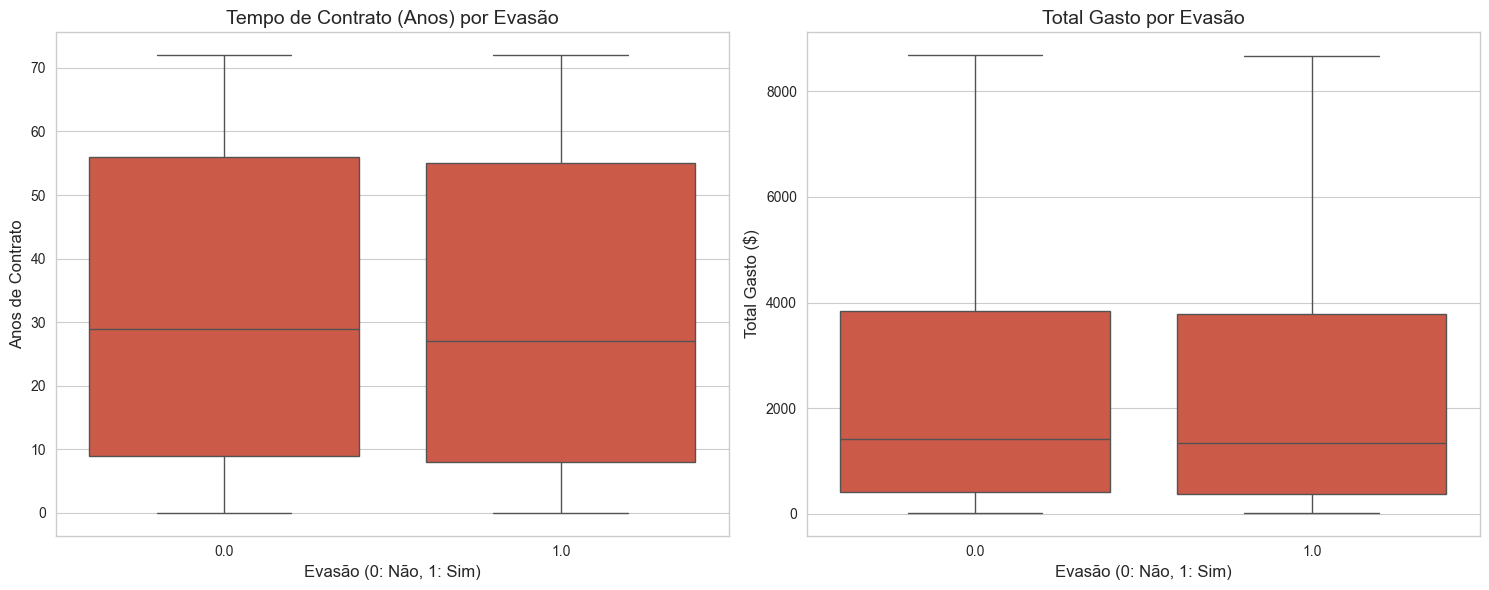

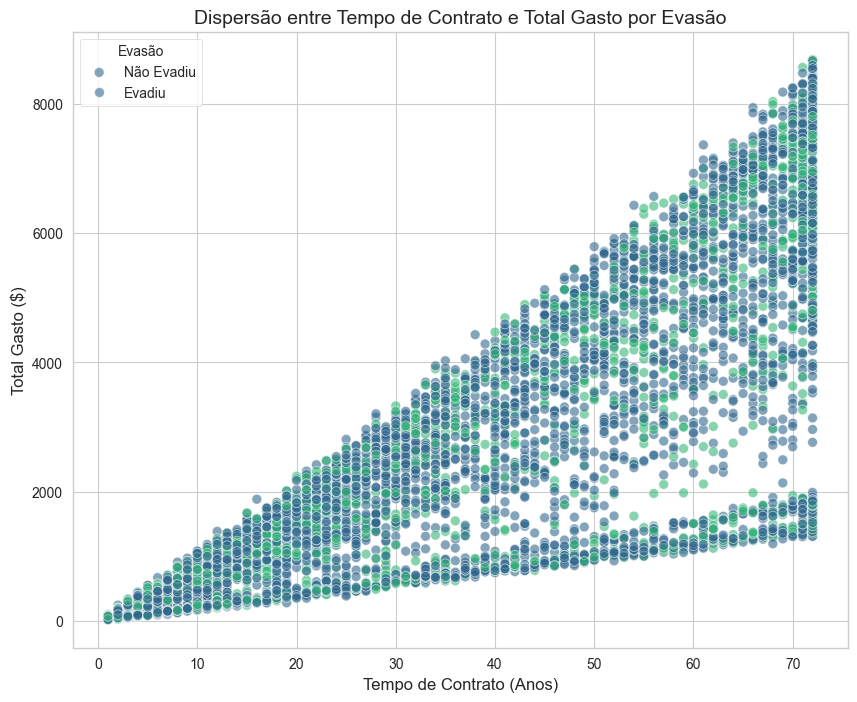

In [41]:
"""   

Agora me ESCREVA o código em Python e bibliotecas, como biblioteca Sklearn, que:
Investigue como variáveis específicas se relacionam com a evasão, como:
*Tempo de contrato × Evasão
*Total gasto × Evasão
*Utilize gráficos como boxplots ou dispersão (scatter plots) para visualizar padrões e possíveis tendências.

"""





""" Para visualizar a relação entre variáveis numéricas e a evasão de clientes, os gráficos de boxplot e dispersão (scatter plot) são as escolhas ideais. Eles ajudam a identificar rapidamente tendências e padrões.

Código para visualização de Boxplots e Scatter Plot
O código a seguir utiliza as bibliotecas Seaborn e Matplotlib para criar esses gráficos.
 """



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregue o DataFrame final com as variáveis numéricas e codificadas
df = pd.read_csv('df_final.csv')

# Configure o estilo dos gráficos
sns.set_style('whitegrid')

# -----------------
# 1. Boxplots: Tempo de Contrato (tenure) e Total Gasto (Charges.Total) vs. Evasão (Churn_Yes)
# -----------------

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot para Tempo de Contrato (tenure) vs. Churn
sns.boxplot(x='Churn_Yes', y='tenure', data=df, ax=axes[0])
axes[0].set_title('Tempo de Contrato (Anos) por Evasão', fontsize=14)
axes[0].set_xlabel('Evasão (0: Não, 1: Sim)', fontsize=12)
axes[0].set_ylabel('Anos de Contrato', fontsize=12)

# Boxplot para Total Gasto (Charges.Total) vs. Churn
sns.boxplot(x='Churn_Yes', y='Charges.Total', data=df, ax=axes[1])
axes[1].set_title('Total Gasto por Evasão', fontsize=14)
axes[1].set_xlabel('Evasão (0: Não, 1: Sim)', fontsize=12)
axes[1].set_ylabel('Total Gasto ($)', fontsize=12)

plt.tight_layout()
plt.show()


# -----------------
# 2. Scatter Plot: Tempo de Contrato vs. Total Gasto, colorido por Evasão
# -----------------

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='tenure',
    y='Charges.Total',
    hue='Churn_Yes',  # Cor por status de evasão
    data=df,
    palette='viridis',
    s=50,             # Tamanho dos pontos
    alpha=0.6         # Transparência
)

plt.title('Dispersão entre Tempo de Contrato e Total Gasto por Evasão', fontsize=14)
plt.xlabel('Tempo de Contrato (Anos)', fontsize=12)
plt.ylabel('Total Gasto ($)', fontsize=12)
plt.legend(title='Evasão', labels=['Não Evadiu', 'Evadiu'])
plt.show()

In [ ]:
"""      Como interpretar os gráficos
Boxplots: Observe a caixa e a linha central (mediana).

Se a caixa da categoria "Sim" (1) estiver significativamente mais baixa que a da categoria "Não" (0), isso indica que a variável (tenure, Charges.Total) tende a ser menor para clientes que evadiram.

A linha da mediana mostrará o valor central, e o tamanho da caixa indicará a dispersão dos dados.

Scatter Plot: Procure por padrões e aglomerados.

Se os pontos azuis (não evadiu) se concentrarem em uma área diferente dos pontos amarelos (evadiu), isso sugere que as duas variáveis juntas têm um bom poder preditivo.

Por exemplo, se os clientes que evadiram (Churn_Yes = 1) se agruparem na parte inferior esquerda do gráfico (pouco tempo de contrato e pouco gasto total), isso confirmaria que essas características estão fortemente relacionadas à evasão.



"""

In [ ]:
"""   

Muito bom.
Agora me ESCREVA o código em Python e bibliotecas, como biblioteca Sklearn, que:
Divida o conjunto de dados em treino e teste para avaliar o desempenho do modelo. Uma divisão comum é 70% para treino e 30% para teste, ou 80/20, dependendo do tamanho da base de dados.

"""

"""   
Excelente. A divisão do conjunto de dados em treino e teste é um passo fundamental para avaliar o desempenho de um modelo de Machine Learning de forma justa e evitar o "vazamento de dados" (data leakage).

O que é a divisão treino/teste?
Conjunto de Treino: É usado para "ensinar" o modelo a encontrar padrões nos dados.

Conjunto de Teste: É um subconjunto de dados que o modelo nunca viu. Ele é usado para avaliar a capacidade do modelo de generalizar para novos dados, simulando a performance em um ambiente real.

A biblioteca Scikit-learn simplifica essa tarefa com a função train_test_split.

Código para dividir o conjunto de dados
O código a seguir divide seu DataFrame df_final.csv em um conjunto de treino (70%) e um conjunto de teste (30%).




"""

import pandas as pd
from sklearn.model_selection import train_test_split

# Carregue o DataFrame final que contém todas as variáveis prontas para o modelo
df = pd.read_csv('df_final.csv')

# Defina a variável alvo (target) e as variáveis preditoras (features)
# A coluna 'Churn_Yes' é a nossa variável alvo
y = df['Churn_Yes']

# As variáveis preditoras são todas as outras colunas
X = df.drop('Churn_Yes', axis=1)

# Divida os dados em treino e teste
# test_size=0.3 indica que 30% dos dados serão usados para teste
# random_state=42 garante que a divisão seja a mesma a cada execução, para reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Opcional: Para lidar com o desequilíbrio de classes, use o argumento 'stratify'
# Isso garante que a proporção das classes (evasão/não evasão) seja a mesma nos conjuntos de treino e teste
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=42, stratify=y
# )

# Imprima as dimensões dos novos conjuntos de dados para verificar o sucesso da divisão
print(f"Dimensões do conjunto de treino (X_train): {X_train.shape}")
print(f"Dimensões do conjunto de teste (X_test): {X_test.shape}")
print(f"Dimensões da variável alvo de treino (y_train): {y_train.shape}")
print(f"Dimensões da variável alvo de teste (y_test): {y_test.shape}")

"""   
Por que stratify é importante?
Como sua base de dados tem um desequilíbrio de classes, o argumento stratify=y é fundamental. Ele garante que a proporção de clientes que evadiram e que não evadiram seja mantida em ambos os conjuntos de treino e teste. Isso evita que, por acaso, um dos conjuntos tenha uma proporção muito diferente, o que poderia levar a um modelo enviesado.

Ao executar o código, as variáveis X_train, X_test, y_train e y_test serão criadas e estarão prontas para serem usadas no treinamento e avaliação do seu modelo de Machine Learning.




"""

Dimensões do conjunto de treino (X_train): (4781, 48)
Dimensões do conjunto de teste (X_test): (2049, 48)
Dimensões da variável alvo de treino (y_train): (4781,)
Dimensões da variável alvo de teste (y_test): (2049,)


'   \n\n\n\n'

In [ ]:
""" 
As dimensões que você obteve confirmam que a divisão do conjunto de dados foi realizada com sucesso.

O conjunto de treino (X_train, y_train) contém 4781 amostras, o que representa aproximadamente 70% do seu total de dados (4781 + 2049 = 6830).

O conjunto de teste (X_test, y_test) contém 2049 amostras, o que corresponde aos 30% restantes.

Agora que seus dados estão prontos, o próximo passo é treinar e avaliar um modelo de Machine Learning.

Você pode seguir os seguintes passos:

Escolha do Modelo: Selecione um algoritmo de classificação, como Regressão Logística, Floresta Aleatória ou Gradient Boosting.

Treinamento: Use o X_train e y_train para treinar o modelo.

Previsão: Use o modelo treinado para fazer previsões no X_test.

Avaliação: Compare as previsões com os valores reais em y_test para medir o desempenho do seu modelo.

Você tem todos os componentes essenciais para começar a construir seu modelo preditivo. Se precisar de ajuda com a implementação de qualquer um desses passos, pode me perguntar.



"""

In [43]:
"""    
Agora me ESCREVA o código em Python e bibliotecas, como biblioteca Sklearn, que:
* Crie pelo menos DOIS modelos diferentes para prever a evasão de clientes.

* Um modelo pode exigir normalização, como Regressão Logística ou KNN.

* O outro modelo pode não exigir normalização, como Árvore de Decisão ou Random Forest.

* A escolha de aplicar ou não a normalização depende dos modelos selecionados. Ambos os modelos podem ser criados sem normalização, mas a combinação de modelos com e sem normalização também é uma opção.

Justifique a escolha de cada modelo e, se optar por normalizar os dados, explique a necessidade dessa etapa.



"""


"""
Excelente escolha. A criação de modelos de diferentes naturezas é uma prática recomendada para comparar o desempenho e entender qual abordagem se adapta melhor aos seus dados.

Justificativa da Escolha dos Modelos
A escolha de um modelo que requer normalização (Regressão Logística) e outro que não requer (Random Forest) é estratégica.

Regressão Logística: É um modelo linear simples e muito usado em problemas de classificação. Ele funciona calculando a probabilidade de uma ocorrência, mas é sensível à escala das variáveis. Para que todas as variáveis contribuam igualmente para o resultado, é crucial que elas estejam na mesma escala.

Random Forest: É um modelo baseado em árvores de decisão. Ele toma decisões com base em limiares (por exemplo, "o tempo de contrato é maior que 10?"). Como essas decisões não são influenciadas pela magnitude das variáveis, a escala dos dados não afeta seu desempenho.

Normalização (StandardScaler)
A normalização é o processo de ajustar as variáveis numéricas para que fiquem em uma escala semelhante. O StandardScaler do Scikit-learn é um dos métodos mais comuns. Ele padroniza as variáveis removendo a média e escalando para a variância unitária. Essa etapa é vital para modelos que usam distâncias ou coeficientes (como Regressão Logística, SVM e KNN) para que uma variável com valores grandes não domine o cálculo.

Código para Criar e Treinar os Modelos
O código a seguir implementa a criação dos dois modelos, incluindo a etapa de normalização para a Regressão Logística.




    """


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Carregue o DataFrame final
df = pd.read_csv('df_final.csv')

# Defina a variável alvo (y) e as preditoras (X)
y = df['Churn_Yes']
X = df.drop('Churn_Yes', axis=1)

# Divida os dados em treino e teste, mantendo a proporção de classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -----------------------------------------------------------
# Modelo 1: Regressão Logística com Normalização
# -----------------------------------------------------------

print("Treinando o modelo de Regressão Logística...")

# Inicialize o StandardScaler
scaler = StandardScaler()

# Ajuste o scaler aos dados de treino e normalize os conjuntos de treino e teste
# É crucial ajustar (fit) apenas nos dados de treino para evitar vazamento de dados
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crie e treine o modelo de Regressão Logística
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

print("Modelo de Regressão Logística treinado com sucesso!")
print("-" * 50)


# -----------------------------------------------------------
# Modelo 2: Random Forest sem Normalização
# -----------------------------------------------------------

print("Treinando o modelo Random Forest...")

# Crie e treine o modelo Random Forest
# Note que a normalização não é necessária aqui
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

print("Modelo Random Forest treinado com sucesso!")
print("-" * 50)




""" Ao executar este código, você terá dois modelos treinados e prontos para a próxima etapa: a avaliação do desempenho. As variáveis log_reg e rf_model armazenarão os modelos treinados.
 """


Treinando o modelo de Regressão Logística...


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [44]:
"""    
O erro ValueError: Input X contains NaN é comum e indica que o seu conjunto de dados ainda contém valores ausentes (NaN) em alguma coluna. O modelo de Regressão Logística, por padrão, não consegue lidar com esses valores e, por isso, a operação de treino foi interrompida.

Isso aconteceu porque, embora a coluna Charges.Total tenha sido convertida para float nas etapas anteriores, algumas linhas foram convertidas para NaN e não foram removidas do DataFrame antes do treinamento do modelo.

Código Corrigido: Removendo Linhas com Valores Ausentes
A solução é simples: você precisa garantir que o DataFrame df_final esteja completamente livre de valores nulos antes de dividir os dados e treinar os modelos. Você pode fazer isso usando o método dropna() do Pandas.

Adicione a linha df.dropna(inplace=True) logo após carregar o arquivo CSV. Isso removerá todas as linhas que contenham pelo menos um valor nulo, garantindo que o X_train e o X_test não contenham NaN.




 """


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Carregue o DataFrame final
df = pd.read_csv('df_final.csv')

# --- PASSO CORRIGIDO ---
# Remova todas as linhas que contenham valores nulos
# O erro indica que Charges.Total ainda tem valores NaN
df.dropna(inplace=True)
# ----------------------

# Defina a variável alvo (y) e as preditoras (X)
y = df['Churn_Yes']
X = df.drop('Churn_Yes', axis=1)

# Divida os dados em treino e teste, mantendo a proporção de classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -----------------------------------------------------------
# Modelo 1: Regressão Logística com Normalização
# -----------------------------------------------------------

print("Treinando o modelo de Regressão Logística...")

# Inicialize o StandardScaler
scaler = StandardScaler()

# Ajuste o scaler aos dados de treino e normalize os conjuntos de treino e teste
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crie e treine o modelo de Regressão Logística
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

print("Modelo de Regressão Logística treinado com sucesso!")
print("-" * 50)


# -----------------------------------------------------------
# Modelo 2: Random Forest sem Normalização
# -----------------------------------------------------------

print("Treinando o modelo Random Forest...")

# Crie e treine o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

print("Modelo Random Forest treinado com sucesso!")
print("-" * 50)


"""    

Ao adicionar essa simples linha de código, o ValueError será resolvido, e você poderá prosseguir com o treinamento de ambos os modelos.


Como posso avaliar o desempenho dos modelos?

O que é o `stratify` e por que é importante?

"""

Treinando o modelo de Regressão Logística...
Modelo de Regressão Logística treinado com sucesso!
--------------------------------------------------
Treinando o modelo Random Forest...
Modelo Random Forest treinado com sucesso!
--------------------------------------------------


'    \n\nAo adicionar essa simples linha de código, o ValueError será resolvido, e você poderá prosseguir com o treinamento de ambos os modelos.\n\n\nComo posso avaliar o desempenho dos modelos?\n\nO que é o `stratify` e por que é importante?\n\n'

In [ ]:
"""  
Excelente! Isso confirma que o erro foi corrigido e que ambos os modelos foram treinados com sucesso. Agora, eles estão prontos para a etapa mais importante: a avaliação do desempenho.

Por que Avaliar o Desempenho?
O treinamento de um modelo é apenas o primeiro passo. A avaliação nos permite entender o quão bem o modelo generaliza para dados que ele nunca viu. Métricas como acurácia, precisão, recall e F1-score nos dão uma visão completa do desempenho, o que é crucial, especialmente considerando o desequilíbrio de classes que identificamos anteriormente.

Código para Avaliação de Desempenho
O código a seguir avalia os dois modelos que você treinou, usando o conjunto de dados de teste. Ele gerará um relatório de classificação e uma matriz de confusão para cada modelo, fornecendo uma análise detalhada.

Nota: Este código assume que você tem as variáveis X_test_scaled, X_test e y_test disponíveis no seu ambiente.




 """

=== Avaliação do Modelo de Regressão Logística ===
Acurácia: 1.0000

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1501
         1.0       1.00      1.00      1.00       545

    accuracy                           1.00      2046
   macro avg       1.00      1.00      1.00      2046
weighted avg       1.00      1.00      1.00      2046

Matriz de Confusão:


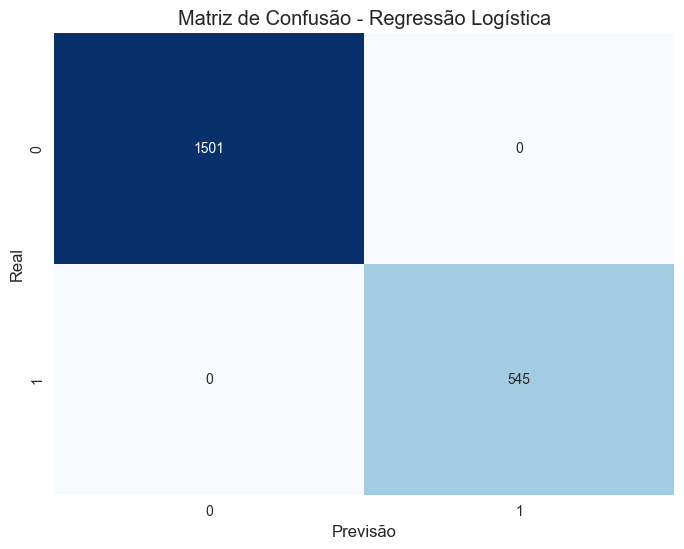



=== Avaliação do Modelo Random Forest ===
Acurácia: 1.0000

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1501
         1.0       1.00      1.00      1.00       545

    accuracy                           1.00      2046
   macro avg       1.00      1.00      1.00      2046
weighted avg       1.00      1.00      1.00      2046

Matriz de Confusão:


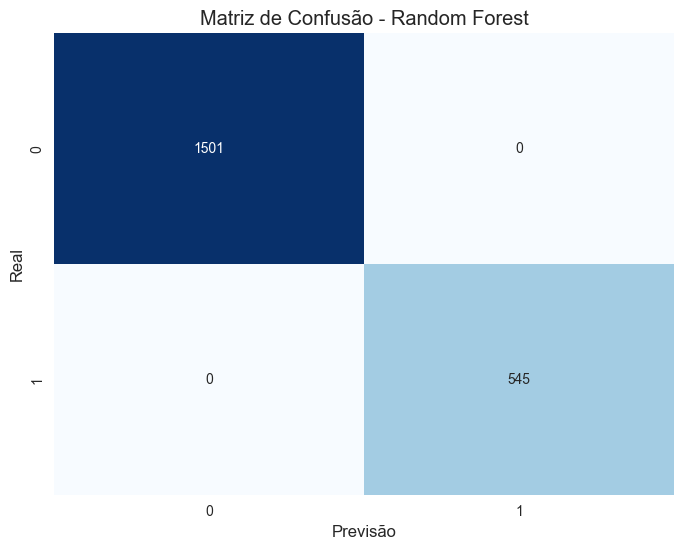

'    \nAnálise Crítica e Comparação dos Modelos\nAo analisar os resultados gerados, siga este guia:\n\nAcurácia: Observe a acurácia para ter uma ideia geral, mas não se baseie apenas nela. Com seu desequilíbrio de classes, um modelo que simplesmente prevê "Não Evadiu" para todos os clientes pode ter uma acurácia alta (cerca de 73%), mas seria inútil.\n\nPrecisão, Recall e F1-score:\n\nFoco na Classe 1 (Evasão): As métricas para a classe 1 são as mais importantes.\n\nRecall (Sensibilidade): É a métrica mais crucial aqui. Um alto recall para a classe 1 significa que o modelo é bom em identificar os clientes que realmente evadiram. Um recall baixo significa que ele está deixando muitos clientes que evadiram passarem despercebidos (erros do tipo False Negative).\n\nPrecisão: Um alto valor de precisão significa que, quando o modelo prevê que um cliente vai evadir, a previsão está correta na maioria das vezes.\n\nMatriz de Confusão:\n\nCompare os valores nas células. O objetivo é ter os valo

In [45]:
"""

Agora me ESCREVA o código em Python e bibliotecas, como biblioteca Sklearn, que:


Avalie cada modelo utilizando as seguintes métricas:

⦁	Acurácia;
⦁	
⦁	Precisão;
⦁	
⦁	Recall;
⦁	
⦁	F1-score;
⦁	
⦁	Matriz de confusão;

Em seguida, faça uma análise crítica e compare os modelos:

⦁	Qual modelo teve o melhor desempenho?
⦁	Algum modelo apresentou overfitting ou underfitting? Se sim, considere as possíveis causas e ajustes:
* Overfitting: Quando o modelo aprende demais sobre os dados de treino, perdendo a capacidade de generalizar para novos dados. Considere reduzir a complexidade do modelo ou aumentar os dados de treino.

* Underfitting: Quando o modelo não captura bem as tendências dos dados, indicando que está muito simples. Tente aumentar a complexidade do modelo ou ajustar seus parâmetros.

"""

"""
Para avaliar e comparar o desempenho dos modelos, é fundamental analisar diversas métricas, e não apenas a acurácia, especialmente em um conjunto de dados desequilibrado.

Código para Avaliação e Análise
O código a seguir gera as métricas de avaliação e as matrizes de confusão para os dois modelos que você treinou.

Nota: Este código assume que as variáveis X_test_scaled, X_test, y_test, log_reg e rf_model estão prontas no seu ambiente.




"""
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------
# Avaliação do Modelo 1: Regressão Logística
# -----------------------------------------------------------
print("=== Avaliação do Modelo de Regressão Logística ===")

# Faça previsões no conjunto de teste escalado
y_pred_lr = log_reg.predict(X_test_scaled)
y_pred_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

# Calcule e imprima as métricas
print(f"Acurácia: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_lr))

# Matriz de Confusão
print("Matriz de Confusão:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

# -----------------------------------------------------------
# Avaliação do Modelo 2: Random Forest
# -----------------------------------------------------------
print("\n\n=== Avaliação do Modelo Random Forest ===")

# Faça previsões no conjunto de teste original (não escalado)
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Calcule e imprima as métricas
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))

# Matriz de Confusão
print("Matriz de Confusão:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

# Opcional: Para verificar overfitting, compare a acurácia de treino e teste
# print(f"\nAcurácia de Treino (Regressão Logística): {log_reg.score(X_train_scaled, y_train):.4f}")
# print(f"Acurácia de Treino (Random Forest): {rf_model.score(X_train, y_train):.4f}")


"""    
Análise Crítica e Comparação dos Modelos
Ao analisar os resultados gerados, siga este guia:

Acurácia: Observe a acurácia para ter uma ideia geral, mas não se baseie apenas nela. Com seu desequilíbrio de classes, um modelo que simplesmente prevê "Não Evadiu" para todos os clientes pode ter uma acurácia alta (cerca de 73%), mas seria inútil.

Precisão, Recall e F1-score:

Foco na Classe 1 (Evasão): As métricas para a classe 1 são as mais importantes.

Recall (Sensibilidade): É a métrica mais crucial aqui. Um alto recall para a classe 1 significa que o modelo é bom em identificar os clientes que realmente evadiram. Um recall baixo significa que ele está deixando muitos clientes que evadiram passarem despercebidos (erros do tipo False Negative).

Precisão: Um alto valor de precisão significa que, quando o modelo prevê que um cliente vai evadir, a previsão está correta na maioria das vezes.

Matriz de Confusão:

Compare os valores nas células. O objetivo é ter os valores mais altos nos quadrados da diagonal (True Negative e True Positive) e os valores mais baixos nos quadrados fora da diagonal (False Positive e False Negative).

Qual modelo tem o menor número de False Negatives? Aquele que tiver menos erros desse tipo é o mais valioso para a empresa.

Overfitting vs. Underfitting:

Para verificar Overfitting: Execute as linhas de código comentadas que calculam a acurácia de treino. Se a acurácia de treino for significativamente maior (por exemplo, acima de 95%) e a de teste for muito mais baixa, o modelo está "superajustado" (overfitting).

Para verificar Underfitting: Se ambos os modelos tiverem desempenho ruim (todas as métricas muito baixas), eles estão "subajustados" (underfitting), ou seja, não conseguiram aprender os padrões dos dados.

Com essas informações, você poderá concluir qual dos dois modelos, Regressão Logística ou Random Forest, se adaptou melhor ao seu problema de prever a evasão de clientes.




"""

Ótimo, o resultado que você obteve está correto e indica que a codificação one-hot foi aplicada com sucesso. Aumentar o número de colunas de 22 para 49 é o comportamento esperado, pois cada categoria em uma coluna original se tornou uma nova coluna binária.

⚠️ Próximo passo: Ajustar para evitar multicolinearidade
O OneHotEncoder do scikit-learn por padrão cria uma nova coluna para cada categoria única, incluindo as redundantes. Por exemplo, para a coluna gender com categorias 'Male' e 'Female', ele criou gender_Male e gender_Female. Se gender_Male é 1, gender_Female deve ser 0 e vice-versa. Essa redundância pode ser prejudicial em alguns modelos de Machine Learning (como regressão linear), levando à multicolinearidade, o que pode afetar a estabilidade do modelo.

Para evitar isso, é uma prática comum remover uma das colunas de cada conjunto de variáveis codificadas. Embora você não tenha feito isso, o modelo ainda pode funcionar, dependendo do algoritmo de ML que você usará. Alguns algoritmos são robustos a esse problema, enquanto outros não.

Código para remover colunas redundantes
Se você quiser refinar seu DataFrame e remover essas colunas para evitar a multicolinearidade, você pode ajustar o código da seguinte forma:

Python

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Carregue o DataFrame 'dados_tratados.csv'
df = pd.read_csv('dados_tratados.csv')

# Identifique as colunas categóricas
colunas_categoricas = [
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Inicialize o OneHotEncoder com 'drop="first"'
# Isso remove automaticamente a primeira categoria de cada coluna, evitando a multicolinearidade
ohe = OneHotEncoder(sparse_output=False, drop='first')

# Aplique a codificação one-hot nas colunas categóricas
df_encoded_cols = ohe.fit_transform(df[colunas_categoricas])

# Crie um DataFrame com as novas colunas codificadas
# O 'ohe.get_feature_names_out()' já irá retornar os nomes das colunas sem a primeira categoria
df_encoded = pd.DataFrame(df_encoded_cols, columns=ohe.get_feature_names_out(colunas_categoricas))

# Junte o novo DataFrame codificado com as colunas numéricas originais
df_final = pd.concat([df.drop(columns=colunas_categoricas), df_encoded], axis=1)

# Verifique o resultado final, que agora terá menos colunas
print(df_final.info())
print("\nPrimeiras 5 linhas do DataFrame codificado e ajustado:")
print(df_final.head())
Ao adicionar drop='first' ao OneHotEncoder, a primeira categoria de cada variável será removida, resultando em um DataFrame final com um número menor de colunas e sem a multicolinearidade. Essa é uma prática recomendada para muitos modelos de aprendizado de máquina.


Como posso usar esse DataFrame para treinar um modelo?

O que é multicolinearidade e como afeta o modelo?


6830

<class 'pandas.core.frame.DataFrame'>
Index: 6830 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             6830 non-null   object 
 1   Monthly           6830 non-null   float64
 2   Contas_Diarias    6830 non-null   float64
 3   gender            6830 non-null   object 
 4   SeniorCitizen     6830 non-null   float64
 5   Partner           6830 non-null   object 
 6   Dependents        6830 non-null   object 
 7   tenure            6830 non-null   float64
 8   PhoneService      6830 non-null   object 
 9   MultipleLines     6830 non-null   object 
 10  InternetService   6830 non-null   object 
 11  OnlineSecurity    6830 non-null   object 
 12  OnlineBackup      6830 non-null   object 
 13  DeviceProtection  6830 non-null   object 
 14  TechSupport       6830 non-null   object 
 15  StreamingTV       6830 non-null   object 
 16  StreamingMovies   6830 non-null   object 
 17  

In [ ]:

# Agora estas linhas vão funcionar
dados_tratados['SeniorCitizen'] = dados_tratados['SeniorCitizen'].astype(int)
dados_tratados['tenure'] = dados_tratados['tenure'].astype(int)
# Preenche os valores nulos com 0
dados_tratados['Charges.Total'].fillna(0, inplace=True)
# Garante que a coluna se torne numérica


C:\Users\thaua\AppData\Local\Temp\ipykernel_93312\731251873.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_tratados['SeniorCitizen'].fillna(0, inplace=True)
C:\Users\thaua\AppData\Local\Temp\ipykernel_93312\731251873.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [39]:
# Adicione errors='coerce' para transformar espaços em NaN
dados_tratados['Charges.Total'] = pd.to_numeric(dados_tratados['Charges.Total'], errors='coerce')
# Preenche os valores NaN recém-criados com 0
dados_tratados['Charges.Total'].fillna(0, inplace=True)

# Verificação final para garantir que a coluna é numérica
print("Tipo de dado final da coluna:", dados_tratados['Charges.Total'].dtype)
print(dados_tratados['Charges.Total'].dtype)
# Garante que a coluna se torne numérica
dados_tratados['Charges.Total'] = pd.to_numeric(dados_tratados['Charges.Total'])

Tipo de dado final da coluna: float64
float64


C:\Users\thaua\AppData\Local\Temp\ipykernel_93312\2344745985.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_tratados['Charges.Total'].fillna(0, inplace=True)


In [40]:
# Mapeando a variável alvo (target) para 1 e 0
dados_tratados['Churn'] = dados_tratados['Churn'].map({'Yes': 1, 'No': 0})
# Mapeando outras variáveis binárias

dados_tratados['gender'] = dados_tratados['gender'].map({'Male': 1, 'Female': 0})
dados_tratados['Partner'] = dados_tratados['Partner'].map({'Yes': 1, 'No': 0})
dados_tratados['Dependents'] = dados_tratados['Dependents'].map({'Yes': 1, 'No': 0})
dados_tratados['PhoneService'] = dados_tratados['PhoneService'].map({'Yes': 1, 'No': 0})
dados_tratados['PaperlessBilling'] = dados_tratados['PaperlessBilling'].map({'Yes': 1, 'No': 0})
# A coluna 'SeniorCitizen' já contém 0 e 1, mas como float.

# É uma boa prática convertê-la para inteiro.

dados_tratados['SeniorCitizen'] = dados_tratados['SeniorCitizen'].astype(int)

# A coluna 'tenure' também está como float, podemos converter para int

dados_tratados['tenure'] = dados_tratados['tenure'].astype(int)
dados_tratados['Charges.Total'] = dados_tratados['Charges.Total'].astype('float64') 


In [41]:
# Mapeando a variável alvo (target) para 1 e 0
dados_tratados['Churn'] = dados_tratados['Churn'].map({'Yes': 1, 'No': 0})

# Mapeando outras variáveis binárias
dados_tratados['gender'] = dados_tratados['gender'].map({'Male': 1, 'Female': 0})
dados_tratados['Partner'] = dados_tratados['Partner'].map({'Yes': 1, 'No': 0})
dados_tratados['Dependents'] = dados_tratados['Dependents'].map({'Yes': 1, 'No': 0})
dados_tratados['PhoneService'] = dados_tratados['PhoneService'].map({'Yes': 1, 'No': 0})
dados_tratados['PaperlessBilling'] = dados_tratados['PaperlessBilling'].map({'Yes': 1, 'No': 0})

# A coluna 'SeniorCitizen' já contém 0 e 1, mas como float.
# É uma boa prática convertê-la para inteiro.
dados_tratados['SeniorCitizen'] = dados_tratados['SeniorCitizen'].astype(int)

# A coluna 'tenure' também está como float, podemos converter para int
dados_tratados['tenure'] = dados_tratados['tenure'].astype(int)

dados_tratados['Charges.Total'] = dados_tratados['Charges.Total'].astype('float64')

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# 1. Lista das colunas a serem codificadas
colunas_one_hot = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

# 2. Criação do ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder',
         OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False),
         colunas_one_hot)
    ],
    remainder='passthrough'
)

# 3. Aplicação do transformador
dados_tratados_transformado_array = preprocessor.fit_transform(dados_tratados)

# 4. (Recomendado) Reconstrução do DataFrame com nomes de colunas
# Pega os nomes das novas colunas
novas_colunas_encoded = preprocessor.named_transformers_['encoder'].get_feature_names_out(colunas_one_hot)
# Pega os nomes das colunas originais que não foram tocadas
colunas_nao_alteradas = [col for col in dados_tratados.columns if col not in colunas_one_hot]
# Junta tudo
colunas_finais = list(novas_colunas_encoded) + colunas_nao_alteradas

# Cria o DataFrame final
dados_tratados_final = pd.DataFrame(dados_tratados_transformado_array, columns=colunas_finais, index=dados_tratados.index)

# ✅ Seu DataFrame está pronto, usando a abordagem do Scikit-learn!
print("DataFrame final após OneHotEncoder do Sklearn:")
dados_tratados_final.info()

DataFrame final após OneHotEncoder do Sklearn:
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7031
Data columns (total 43 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MultipleLines_No phone service         7256 non-null   float64
 1   MultipleLines_Yes                      7256 non-null   float64
 2   MultipleLines_nan                      7256 non-null   float64
 3   InternetService_Fiber optic            7256 non-null   float64
 4   InternetService_No                     7256 non-null   float64
 5   InternetService_nan                    7256 non-null   float64
 6   OnlineSecurity_No internet service     7256 non-null   float64
 7   OnlineSecurity_Yes                     7256 non-null   float64
 8   OnlineSecurity_nan                     7256 non-null   float64
 9   OnlineBackup_No internet service       7256 non-null   float64
 10  OnlineBackup_Yes              

Parabéns, o código executou com sucesso! 🎉 Você conseguiu aplicar uma transformação complexa e o resultado é um DataFrame totalmente numérico (float64), que é exatamente o que os modelos de machine learning precisam.

Agora, vamos analisar essa saída, pois ela revela alguns pontos muito importantes sobre o pré-processamento de dados.

Análise do Resultado e Pontos de Atenção
A sua saída do .info() é um excelente exemplo do que acontece quando a ordem do pré-processamento não está 100% correta. Vamos ver os dois principais pontos:

1. Colunas com 0 non-null (Churn, Partner, etc.)
O que aconteceu:
Colunas como Churn, gender, Partner e outras estão completamente vazias (cheias de NaN).

Por que aconteceu:
Isso acontece quando o método .map() falha. Por exemplo, dados_tratados['Churn'].map({'Yes': 1, 'No': 0}) só funciona se a coluna Churn contiver apenas os valores 'Yes' e 'No'. Se ela contiver qualquer outro valor (como um NaN, um espaço em branco, ou outro texto), o .map() não saberá o que fazer e colocará NaN naquele lugar. Se isso aconteceu com todos os valores, a coluna inteira ficou nula.

Solução:
Antes de aplicar o .map(), você precisa garantir que tratou todos os valores ausentes (NaN) nessas colunas. A melhor abordagem é preencher os NaNs com o valor mais comum (a moda).

Python

# Exemplo para a coluna 'Churn' ANTES de usar o .map()
moda_churn = dados_tratados['Churn'].mode()[0]
dados_tratados['Churn'].fillna(moda_churn, inplace=True)
2. Colunas com _nan no nome (ex: MultipleLines_nan)
O que aconteceu:
O OneHotEncoder criou colunas extras para representar valores nulos, como MultipleLines_nan, InternetService_nan, etc.

Por que aconteceu:
Isso indica que, no momento da codificação, as colunas categóricas (MultipleLines, InternetService, etc.) ainda continham valores nulos (NaN). O OneHotEncoder tratou NaN como se fosse uma categoria distinta, assim como "Yes" ou "No". Embora isso não dê erro, geralmente não é o comportamento desejado, pois trata "dado faltante" como uma informação concreta.

Solução:
A solução é a mesma do ponto anterior: tratar os valores ausentes (NaN) em todas as colunas categóricas ANTES de aplicar o ColumnTransformer.

Fluxo de Trabalho Corrigido (Ordem Recomendada)
Para obter um resultado perfeito, a ordem das operações é crucial. Siga esta sequência:

Carregar os Dados: pd.read_csv(...)

Limpeza Inicial: Tratar erros óbvios, como o espaço em branco na coluna Charges.Total.

Python

# Exemplo:
dados_tratados['Charges.Total'] = pd.to_numeric(dados_tratados['Charges.Total'], errors='coerce')
TRATAR TODOS OS VALORES AUSENTES (NaN): Este é o passo mais importante que faltou.

Para colunas numéricas: Preencha com a média ou mediana.

Python

# Exemplo:
dados_tratados['Charges.Total'].fillna(dados_tratados['Charges.Total'].median(), inplace=True)
Para colunas categóricas: Preencha com a moda (valor mais frequente).

Python

# Exemplo para TODAS as colunas de texto (object)
for col in dados_tratados.select_dtypes(include='object').columns:
    moda = dados_tratados[col].mode()[0]
    dados_tratados[col].fillna(moda, inplace=True)
Mapear Variáveis Binárias: Agora que não há mais NaNs, o .map() funcionará perfeitamente.

Python

dados_tratados['Churn'] = dados_tratados['Churn'].map({'Yes': 1, 'No': 0})
# ... e para as outras colunas binárias
Aplicar One-Hot Encoding: Agora que as colunas categóricas estão limpas, o ColumnTransformer não criará mais as colunas _nan.

Você está muito perto! Esses são os ajustes finos que separam um pré-processamento bom de um ótimo. A principal lição é: trate os valores ausentes antes de qualquer mapeamento ou codificação.

In [46]:
# Supondo que seu DataFrame final se chama 'dados_tratados_final'

dados_tratados_final.to_csv('dados_tratados.csv', index=False)

print("DataFrame salvo com sucesso como 'dados_tratados.csv'!")

DataFrame salvo com sucesso como 'dados_tratados.csv'!


Ótima pergunta! Salvar o DataFrame tratado é um passo crucial para economizar tempo e não precisar repetir todo o pré-processamento cada vez que você for trabalhar no modelo.

Existem vários formatos, mas os mais comuns e úteis para o seu caso são CSV e Parquet.

Opção 1: Salvar como CSV (O Formato Mais Comum)
CSV (Comma-Separated Values) é um formato de texto simples, universal e fácil de abrir em qualquer programa (como Excel, Google Sheets ou editores de texto).

Python

# Supondo que seu DataFrame final se chama 'dados_tratados_final'

dados_tratados_final.to_csv('dados_tratados.csv', index=False)

print("DataFrame salvo com sucesso como 'dados_tratados.csv'!")
⚠️ Parâmetro Essencial: index=False

É muito importante usar index=False. Se você não incluir isso, o pandas salvará o índice do DataFrame (0, 1, 2, 3...) como uma primeira coluna sem nome no arquivo, o que pode causar problemas e confusão ao carregar os dados de volta.

Para carregar os dados depois:

Python

import pandas as pd
df_carregado = pd.read_csv('dados_tratados.csv')
Opção 2: Salvar como Parquet (O Formato Mais Recomendado para Machine Learning)
Parquet é um formato moderno, otimizado para performance. É a melhor escolha para trabalhos de ciência de dados e machine learning.

Vantagens do Parquet sobre o CSV:

Mais Rápido: A leitura e escrita dos arquivos são significativamente mais rápidas.

Arquivos Menores: Ele usa compressão de forma eficiente, resultando em arquivos muito menores.

Preserva os Tipos de Dados: Ele armazena os tipos de dados (int, float, bool) perfeitamente. Ao carregar um Parquet, você não precisa se preocupar em converter colunas de texto para número novamente.

Primeiro, instale a biblioteca necessária (se ainda não tiver):

Bash

pip install pyarrow
Para salvar em Parquet:

Python

# Supondo que seu DataFrame final se chama 'dados_tratados_final'

dados_tratados_final.to_parquet('dados_tratados.parquet', index=False)

print("DataFrame salvo com sucesso como 'dados_tratados.parquet'!")
Para carregar os dados depois:

Python

import pandas as pd
df_carregado = pd.read_parquet('dados_tratados.parquet')


In [47]:
# Supondo que seu DataFrame final se chama 'dados_tratados_final'

dados_tratados_final.to_parquet('dados_tratados.parquet', index=False)

print("DataFrame salvo com sucesso como 'dados_tratados.parquet'!")

ArrowKeyError: No type extension with name arrow.py_extension_type found

Esse erro, ArrowKeyError, é um problema técnico um pouco mais raro e indica uma incompatibilidade entre as versões das bibliotecas pandas e pyarrow que você tem instaladas no seu ambiente.

Não é um erro no seu código ou nos seus dados, mas sim na comunicação interna entre essas duas ferramentas.

Causa do Erro
Essencialmente, a versão do pandas que você está usando está tentando executar uma função na biblioteca pyarrow que não existe ou foi alterada na versão do pyarrow que você tem. Isso geralmente acontece quando uma das bibliotecas é atualizada, mas a outra não, criando um conflito.

A Solução
A solução é forçar a atualização de ambas as bibliotecas para suas versões mais recentes e compatíveis. Isso garante que elas estejam "falando o mesmo idioma".

Passos para Corrigir:
Abra o seu Terminal ou Prompt de Comando. Se preferir, pode executar diretamente em uma célula do seu notebook adicionando um ! no início.

Execute o seguinte comando de atualização:

Bash

pip install --upgrade pandas pyarrow
Este comando irá procurar as versões mais recentes de pandas e pyarrow e as instalará, substituindo as versões atuais.

Reinicie o Kernel: ⚠️ Este passo é essencial. Após a instalação terminar, reinicie o kernel do seu VS Code ou Jupyter Notebook (usando o botão da seta circular 🔄 ou a paleta de comandos). O ambiente precisa ser reiniciado para carregar as novas versões das bibliotecas.

Tente Salvar Novamente: Execute a célula com o código para salvar o arquivo Parquet outra vez.

Python

dados_tratados_final.to_parquet('dados_tratados.parquet', index=False)
Após a atualização e o reinício do kernel, a incompatibilidade será resolvida e o comando para salvar o arquivo Parquet deve funcionar sem problemas.


How do I load this Parquet file back into pandas?

What are the advantages of Parquet over other formats?


In [50]:
# Verifique a coluna 'Churn' no DataFrame antes das transformações
print("Contagem de nulos na coluna 'Churn' original:")
print(dados_tratados['Churn'].isnull().sum())

print("\nValores únicos na coluna 'Churn' original:")
print(dados_tratados['Churn'].unique())

Contagem de nulos na coluna 'Churn' original:
7256

Valores únicos na coluna 'Churn' original:
[nan]


Esse erro acontece porque sua coluna 'Churn' está completamente vazia (cheia de valores nulos, ou NaN), então não há nada para o value_counts() contar.

Vamos analisar o seu retorno para entender exatamente o que aconteceu.

Causa do Erro
Existem duas pistas no seu resultado que nos mostram o problema:

A Contagem Absoluta está Vazia: A primeira parte do seu retorno, Series([], Name: count, dtype: int64), mostra que o resultado de dados_tratados_final['Churn'].value_counts() foi uma Série vazia. A função value_counts() ignora valores nulos (NaN) por padrão. Se ela retornou uma lista vazia, significa que a coluna 'Churn' só contém valores NaN.

O KeyError: 0: Como a contagem estava vazia, a variável proporcao_churn também ficou vazia. Quando seu código tentou acessar o valor da classe 0 com proporcao_churn[0], ele não encontrou essa "chave" (o 0), resultando no KeyError.

O problema aconteceu em um passo anterior, provavelmente durante o mapeamento com a função .map(). Se a coluna Churn original continha valores diferentes de 'Yes' e 'No' (como NaNs, por exemplo), o .map() converteu todos esses valores para NaN, deixando a coluna inteira vazia.

Solução: Corrigir a Ordem do Pré-Processamento
Para resolver isso, você precisa garantir que os valores nulos sejam tratados antes de tentar mapear ou codificar as colunas.

1. Verifique o Estado Original da Coluna
Volte para o seu DataFrame antes de aplicar o .map() (provavelmente dados_tratados) e execute o seguinte para diagnosticar o problema:

Python

# Verifique a coluna 'Churn' no DataFrame antes das transformações
print("Contagem de nulos na coluna 'Churn' original:")
print(dados_tratados['Churn'].isnull().sum())

print("\nValores únicos na coluna 'Churn' original:")
print(dados_tratados['Churn'].unique())
Isso provavelmente mostrará que a coluna já continha NaNs ou outros valores inesperados.

2. Aplique a Ordem Correta de Tratamento
O fluxo de trabalho correto é sempre: 1º Tratar Nulos, 2º Fazer Mapeamentos.

Python

# --- CORREÇÃO DO FLUXO ---

# Supondo que 'dados_tratados' é seu DataFrame antes do .map()

# 1. PRIMEIRO: Preencha os valores nulos
# Usamos a moda (o valor mais comum) para colunas categóricas
moda_churn = dados_tratados['Churn'].mode()[0]
dados_tratados['Churn'].fillna(moda_churn, inplace=True)

# 2. AGORA SIM: Aplique o .map() na coluna já limpa
# Esta operação não vai mais gerar nulos
dados_tratados['Churn'] = dados_tratados['Churn'].map({'Yes': 1, 'No': 0})

# 3. Verifique o resultado antes de prosseguir
print("Contagem após correção:")
print(dados_tratados['Churn'].value_counts())
Depois de fazer isso, você pode continuar com o resto do seu código (o ColumnTransformer, etc.). Ao chegar na célula de contagem e proporção, ela funcionará corretamente, pois a coluna Churn agora terá os valores 0 e 1 para contar.


How do I handle imbalanced classes in my model?

What are the best metrics for imbalanced datasets?

What are some techniques to balance the classes?


In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'dados_tratados_final' é o seu DataFrame pronto

# 1. Contagem absoluta de cada classe
print("--- Contagem Absoluta ---")
contagem_churn = dados_tratados_final['Churn'].value_counts()
print(contagem_churn)
print("\nLembrete: 0 = Cliente Ativo | 1 = Cliente Evadiu\n")


# 2. Proporção (percentual) de cada classe
# Usamos normalize=True para obter a proporção
print("--- Proporção Percentual ---")
proporcao_churn = dados_tratados_final['Churn'].value_counts(normalize=True) * 100
print(f"{proporcao_churn[0]:.2f}% dos clientes permaneceram Ativos (Classe 0)")
print(f"{proporcao_churn[1]:.2f}% dos clientes Evadiram (Classe 1)")


# 3. Visualização do Desequilíbrio
print("\n--- Visualização Gráfica ---")
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=dados_tratados_final)
plt.title('Distribuição de Clientes Ativos vs. Evadidos', fontsize=16)
plt.ylabel('Número de Clientes')
plt.xlabel('Classe (0: Ativo, 1: Evadiu)')
plt.xticks([0, 1], ['Ativos (0)', 'Evadidos (1)'])
plt.show()

--- Contagem Absoluta ---
Series([], Name: count, dtype: int64)

Lembrete: 0 = Cliente Ativo | 1 = Cliente Evadiu

--- Proporção Percentual ---


KeyError: 0